In [1]:
import sys
sys.path.insert(0, '../src')
from gauges import *

%config Completer.use_jedi = False #for auto complete code

In [2]:
conn = sqlite3.connect('../data/DZ/niveles_automaticos2.db')
cuencas_shp=gpd.read_file('../data/shp/cuencas/UH.shp')
Estacion_automatica=Automatica(database=conn)

# Estaciones Automaticas en la DZ 4 y 9 

In [3]:
DZ4_cuenca_estaciones,DZ4_cuencas=Estacion_automatica.estaciones_por_cuenca_dz(4)
DZ9_cuenca_estaciones,DZ9_cuencas=Estacion_automatica.estaciones_por_cuenca_dz(9)
maestro =Estacion_automatica.get_Maestro()
mapa=folium.Map(location=[maestro.LATITUD.mean(),maestro.LONGITUD.mean()],zoom_start=6)

In [4]:
for cuenca in DZ4_cuenca_estaciones:
    filtro=maestro[maestro['CODIGO'].isin(DZ4_cuenca_estaciones[cuenca])]
    gauge_stations(filtro,cuencas_shp,mapa,cuenca)

for cuenca in DZ9_cuenca_estaciones:
    filtro=maestro[maestro['CODIGO'].isin(DZ9_cuenca_estaciones[cuenca])]
    gauge_stations(filtro,cuencas_shp,mapa,cuenca)

In [5]:
mapa

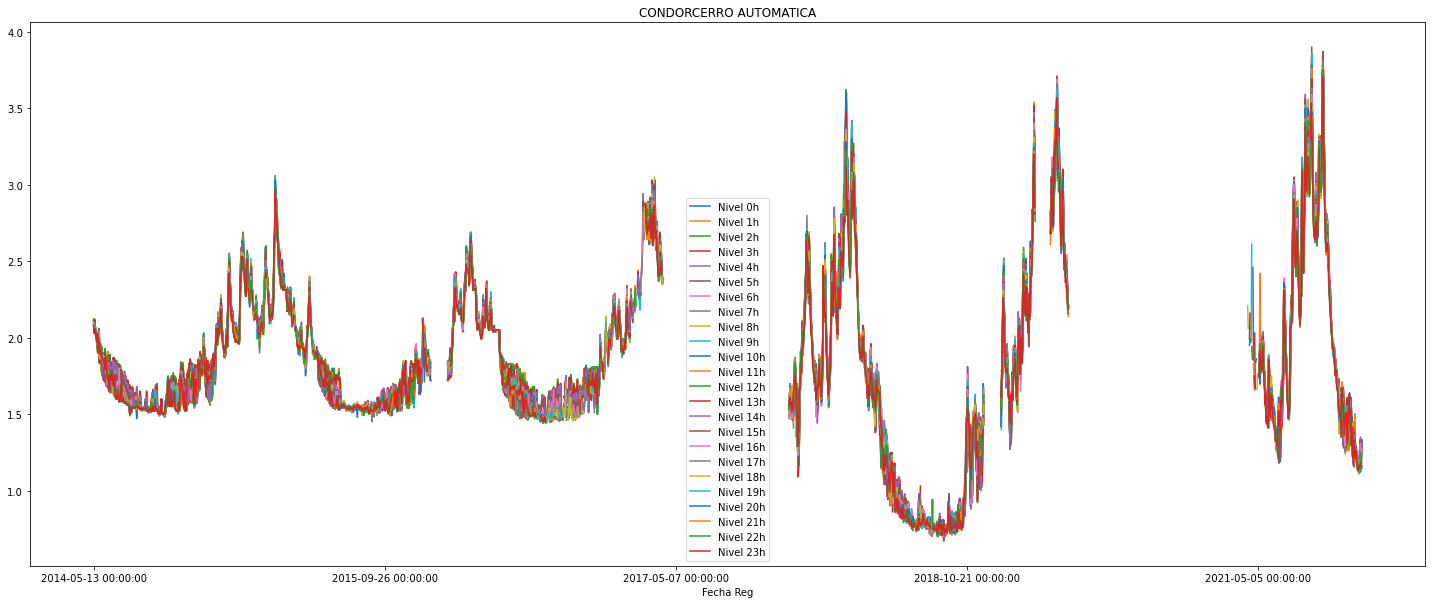

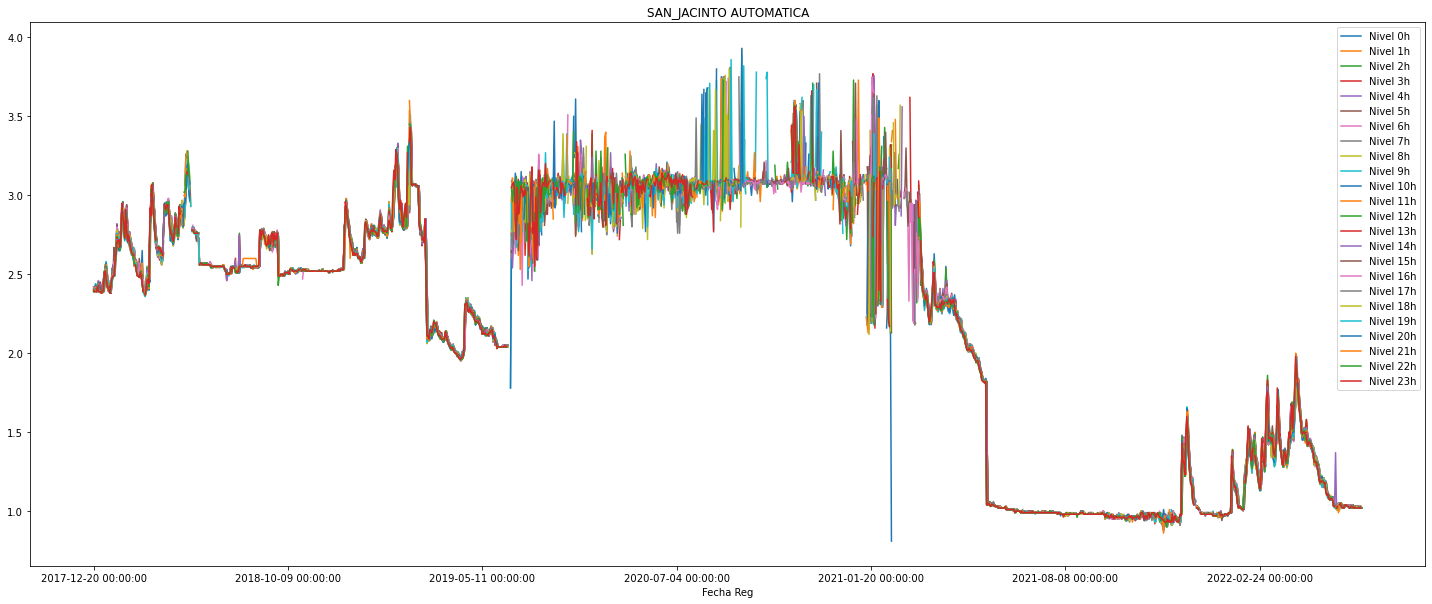

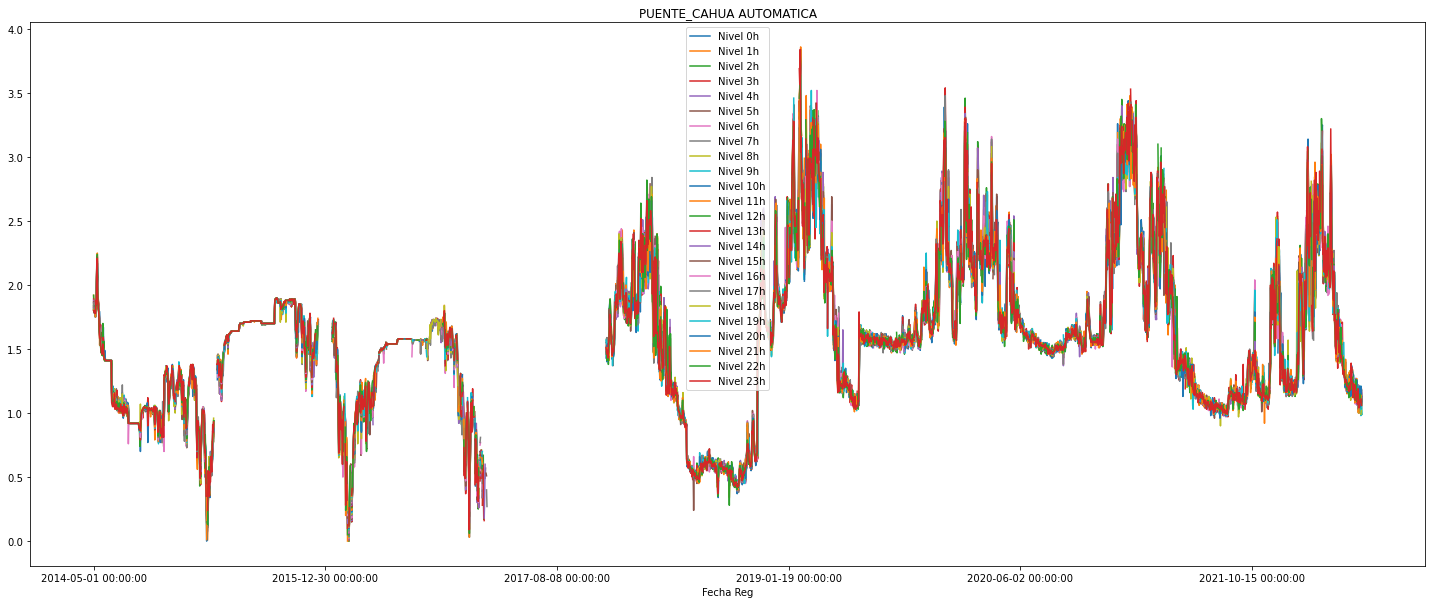

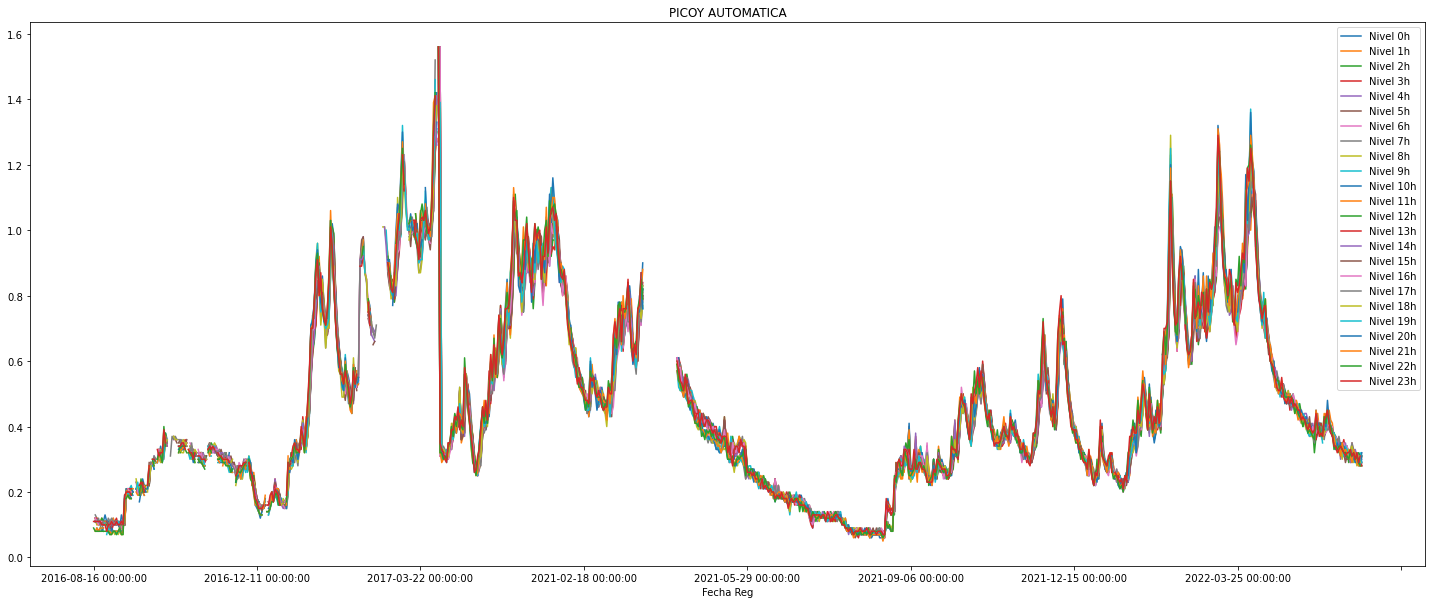

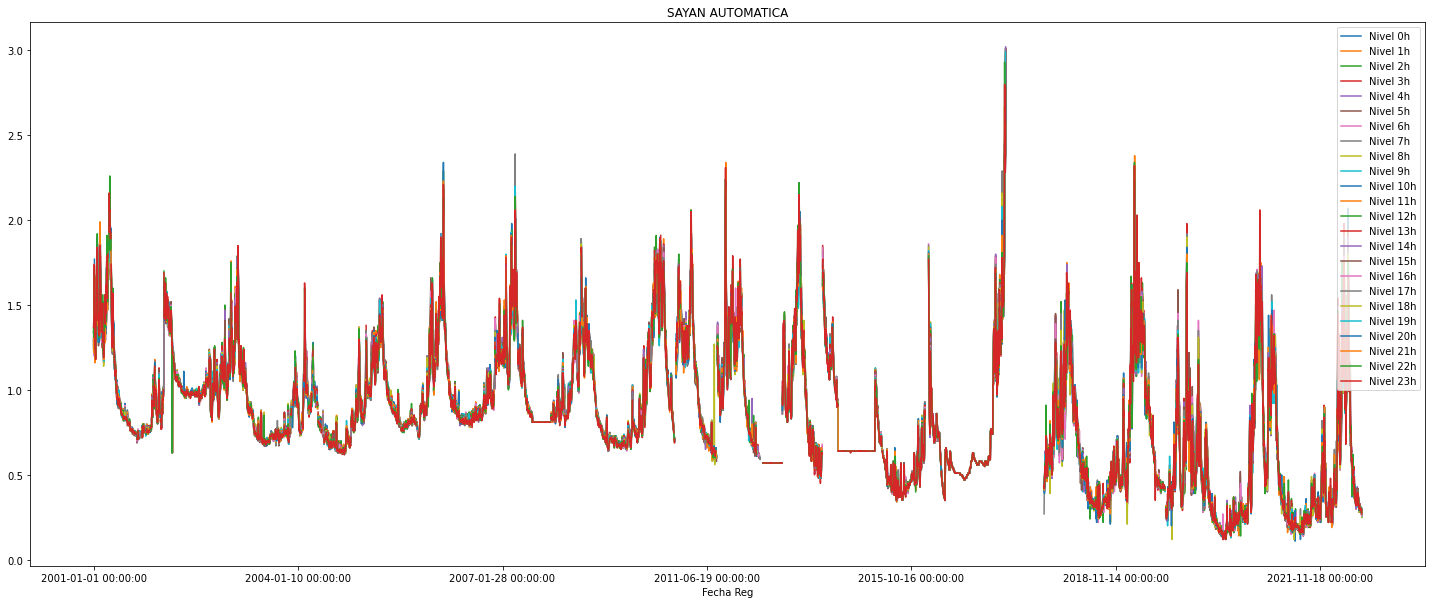

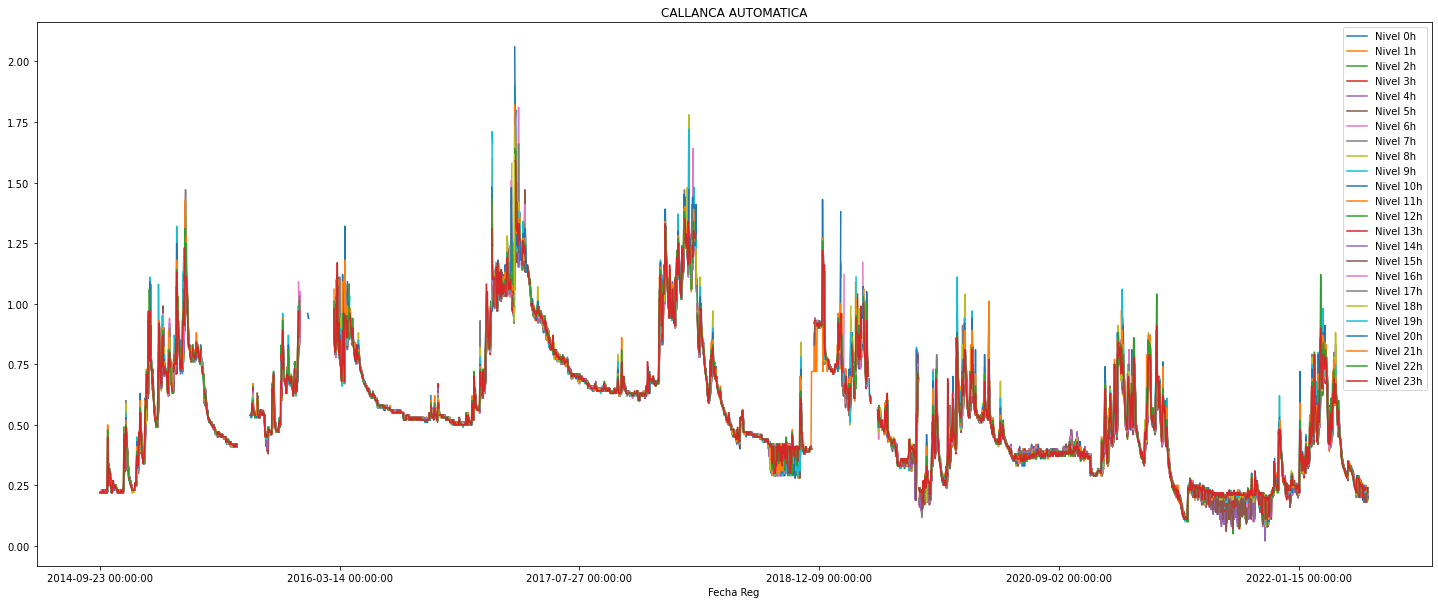

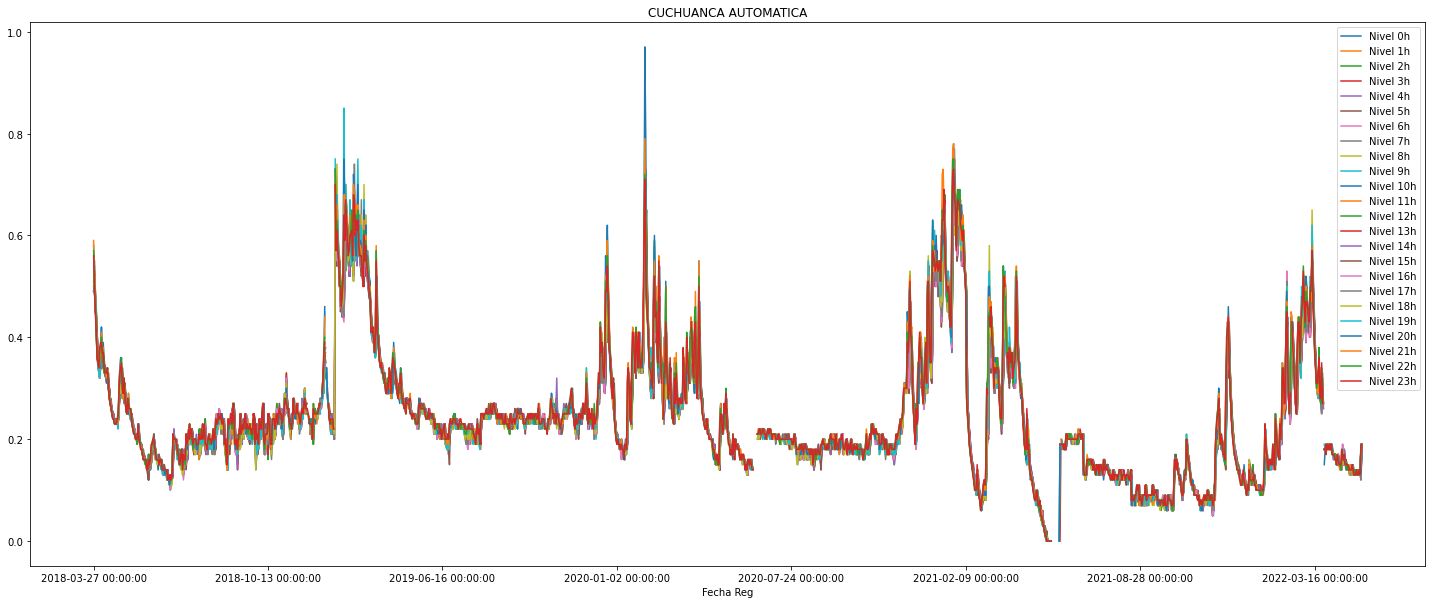

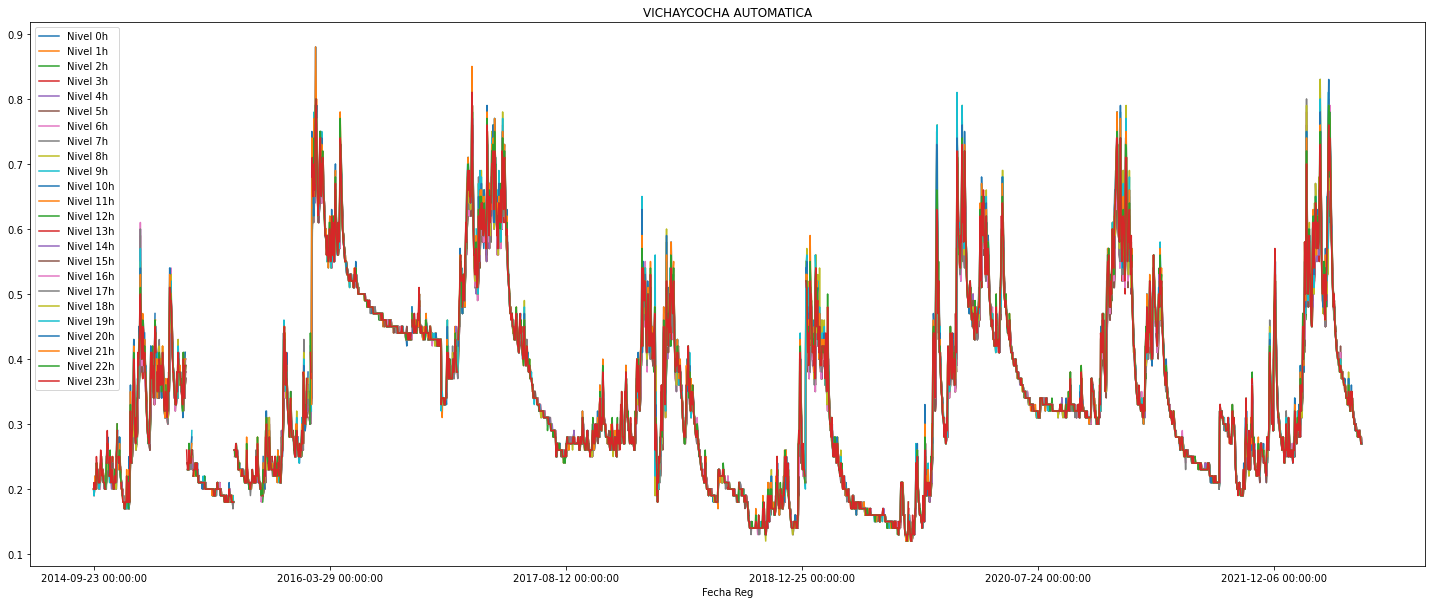

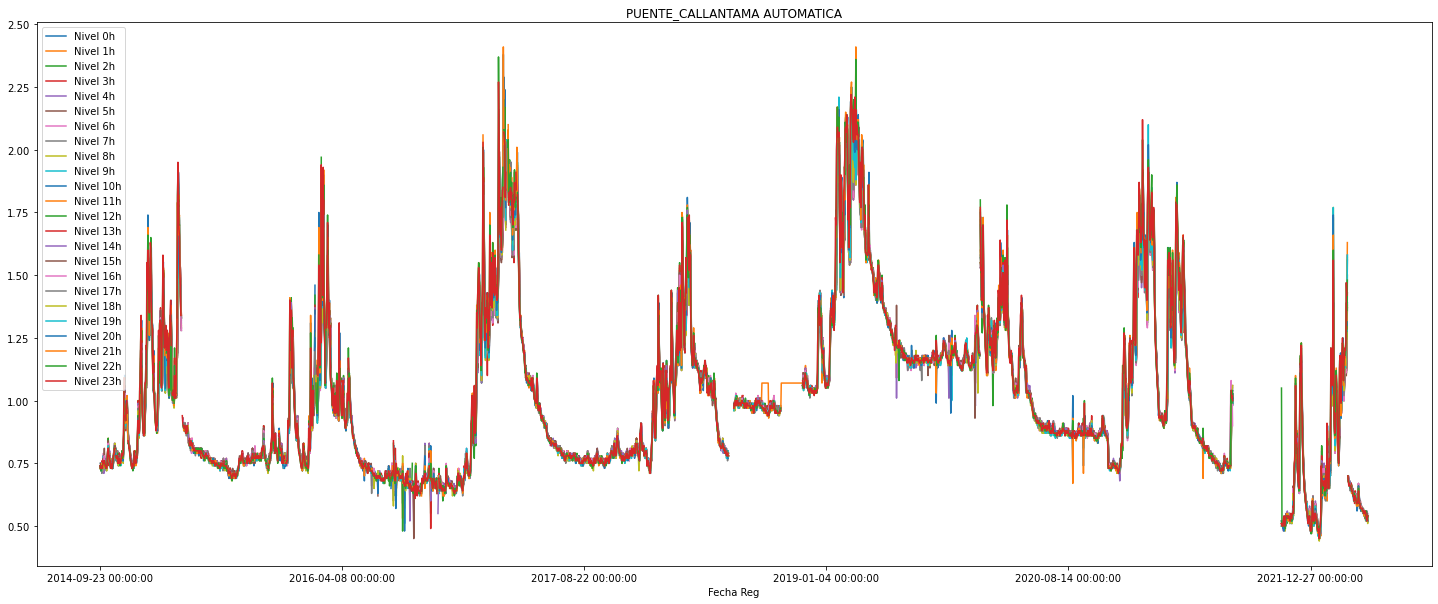

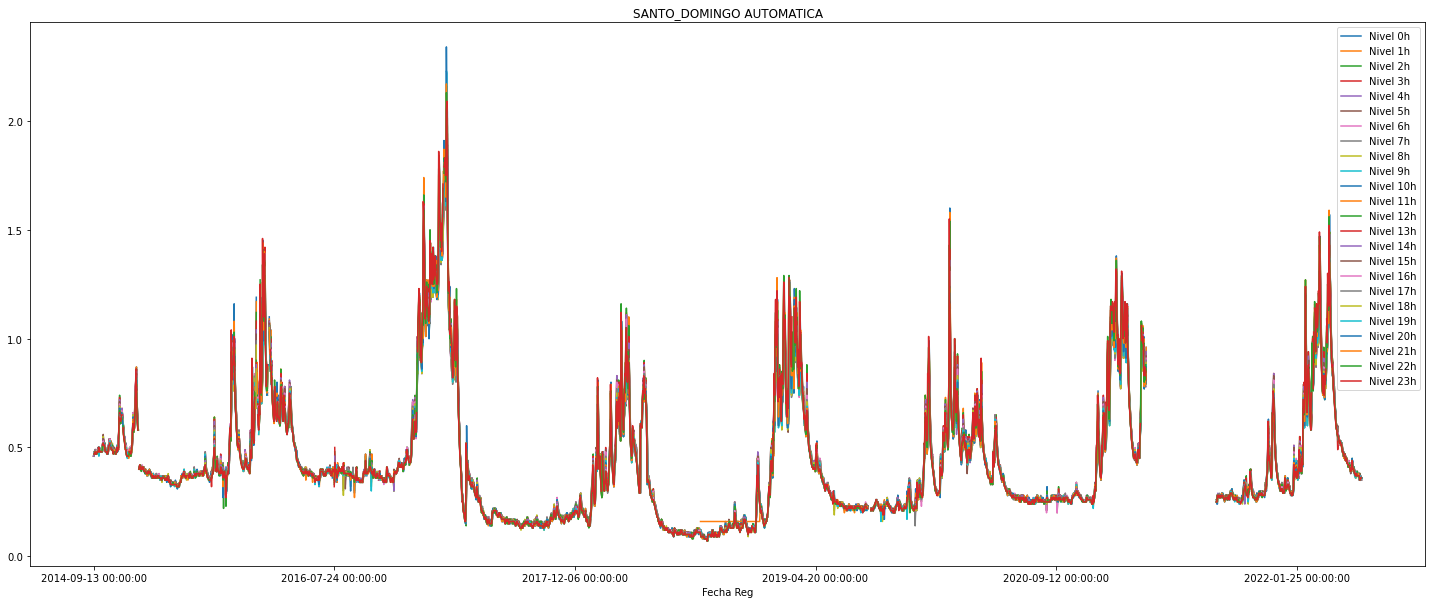

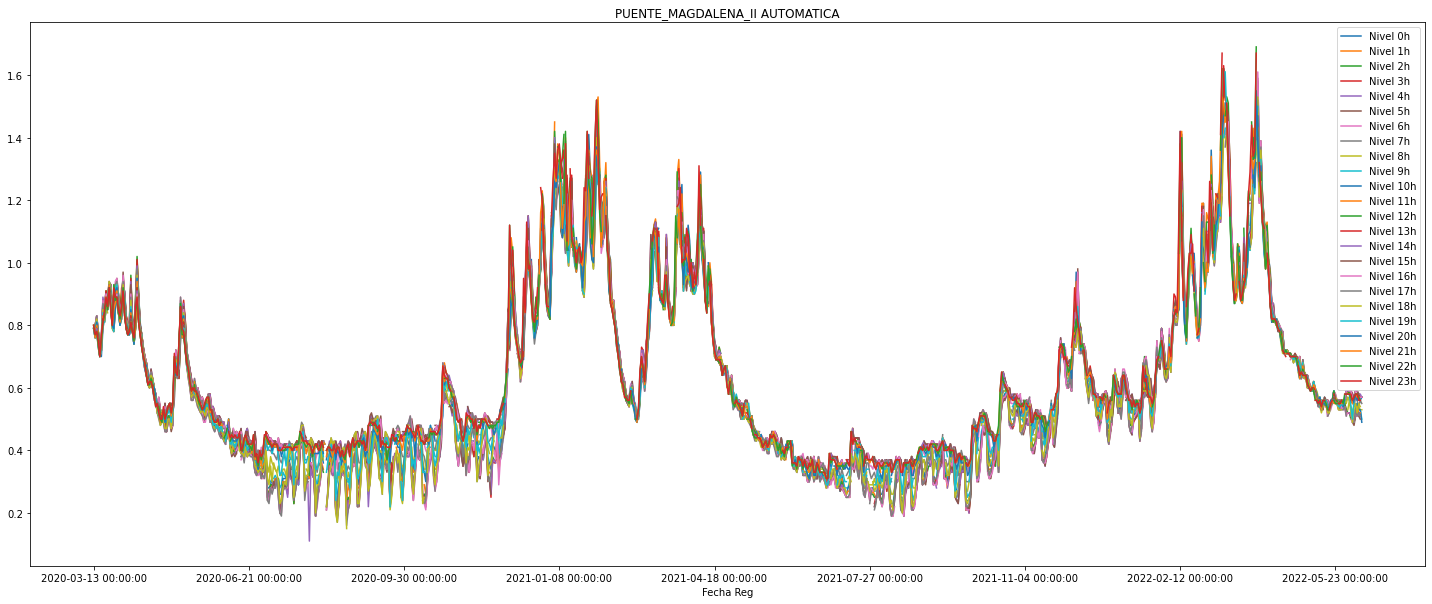

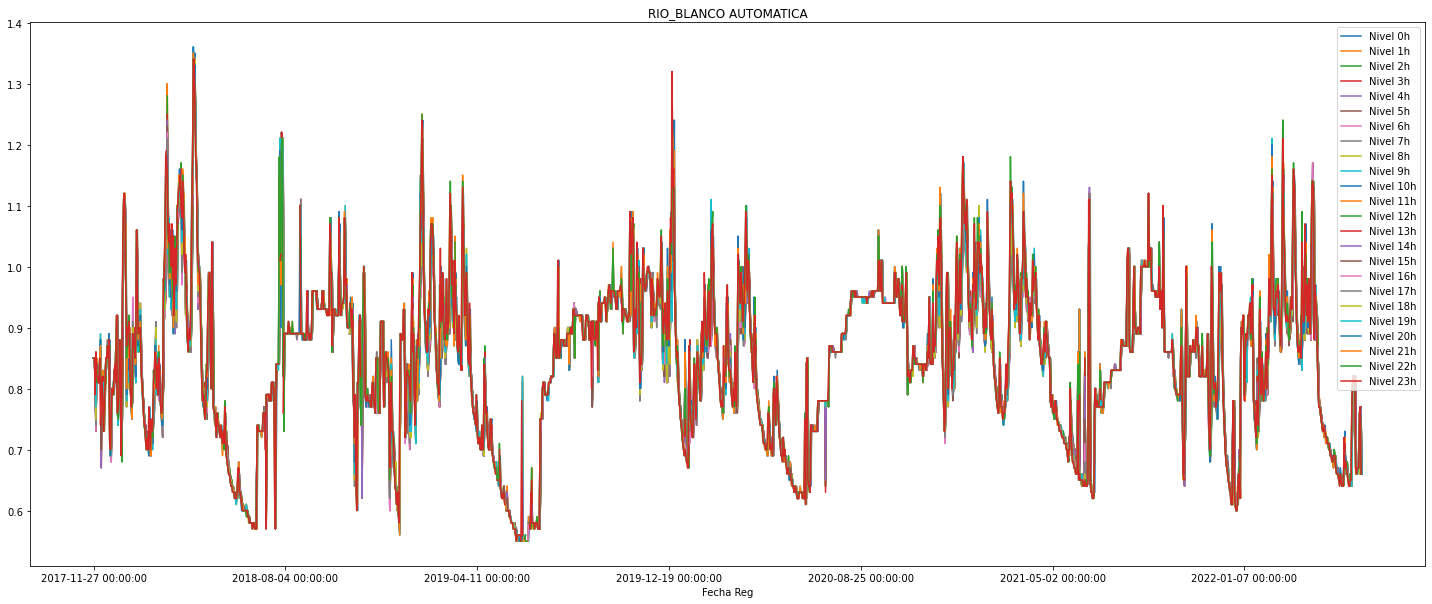

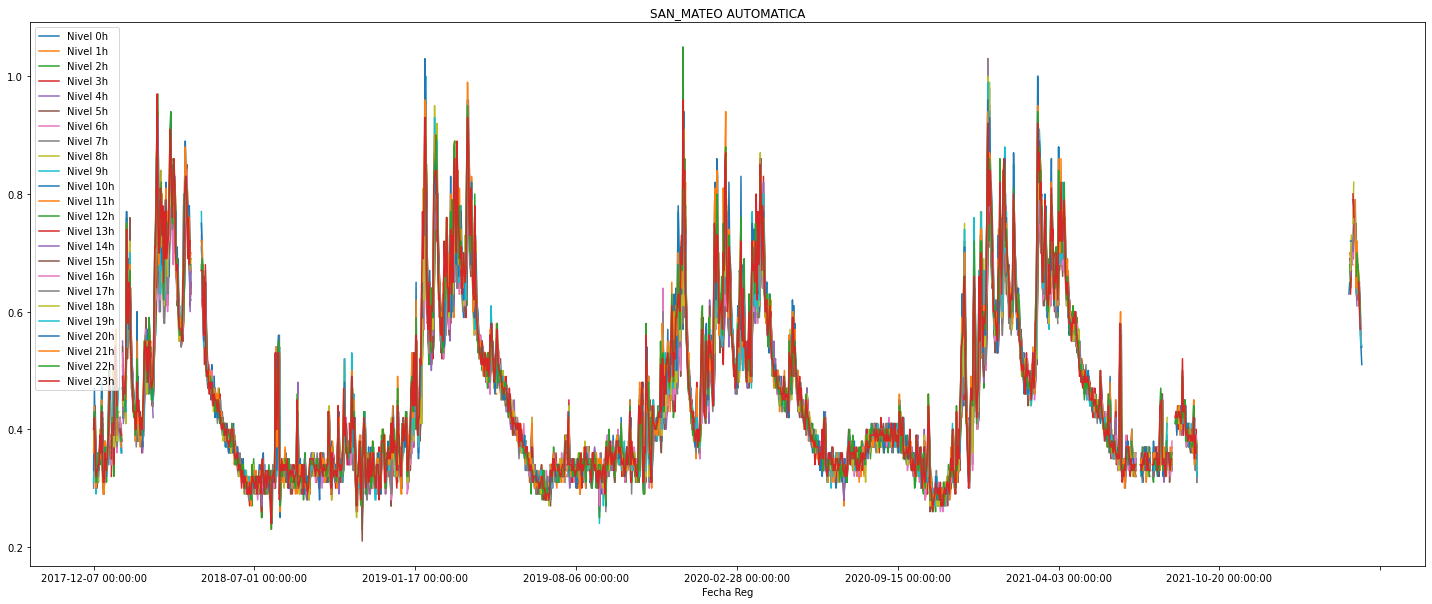

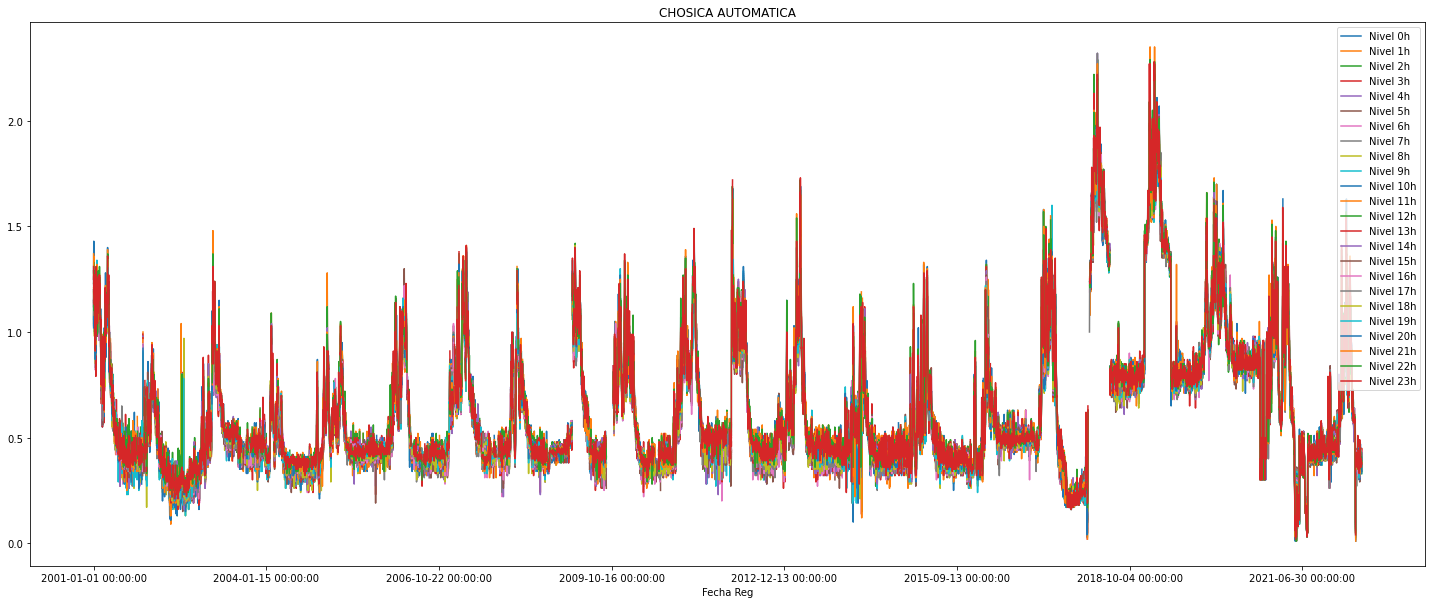

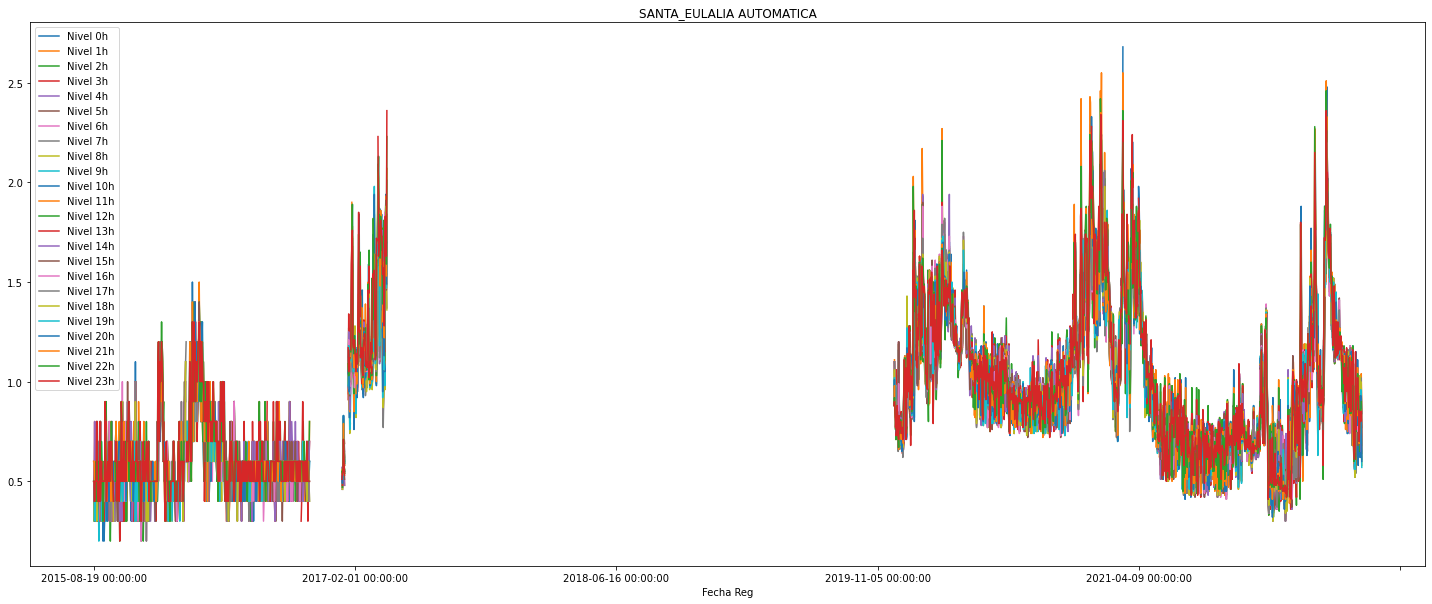

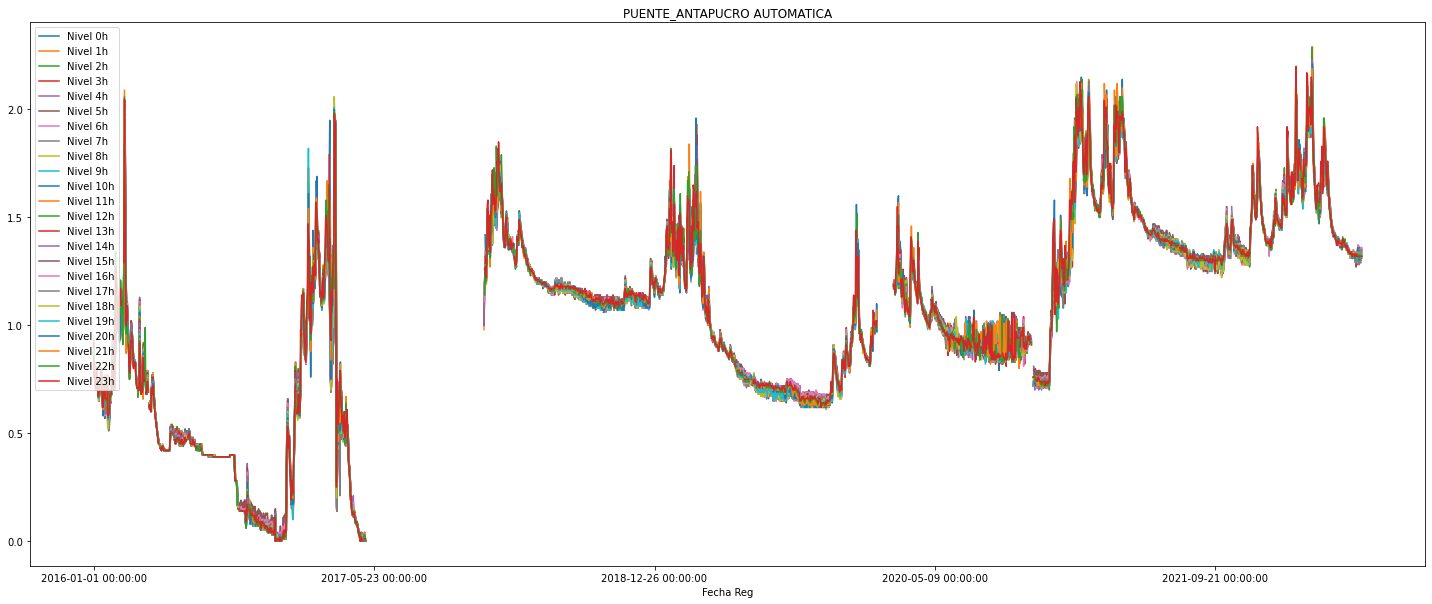

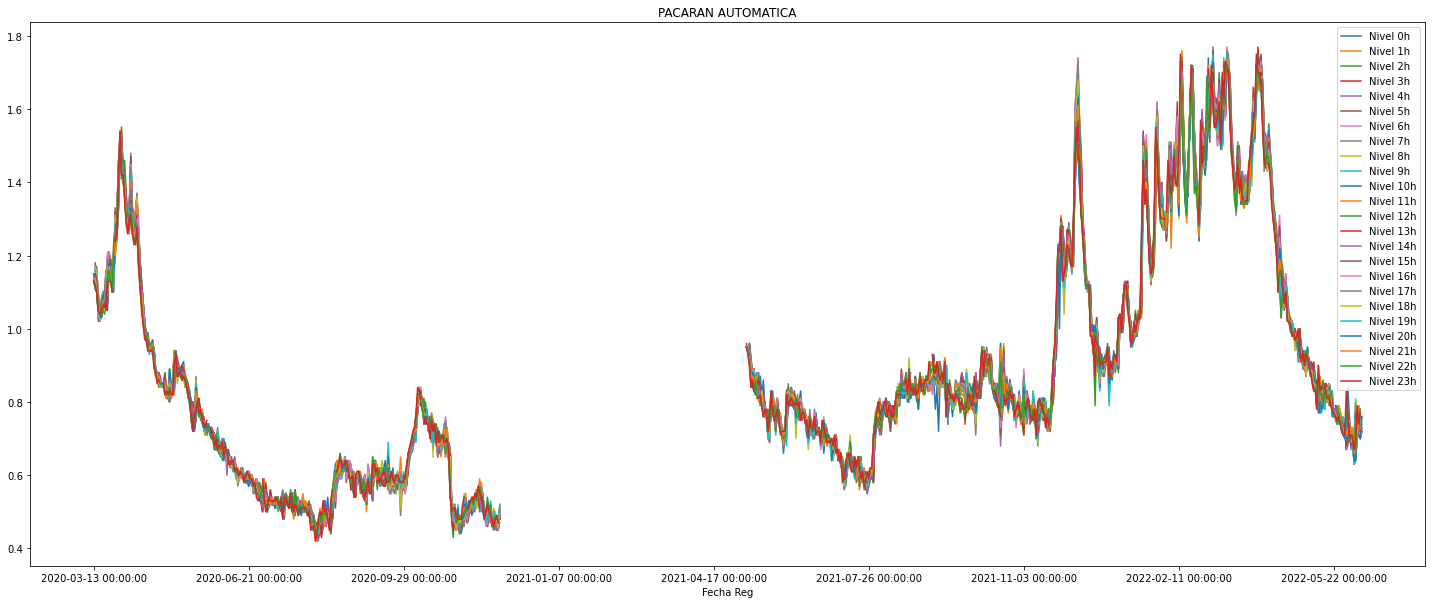

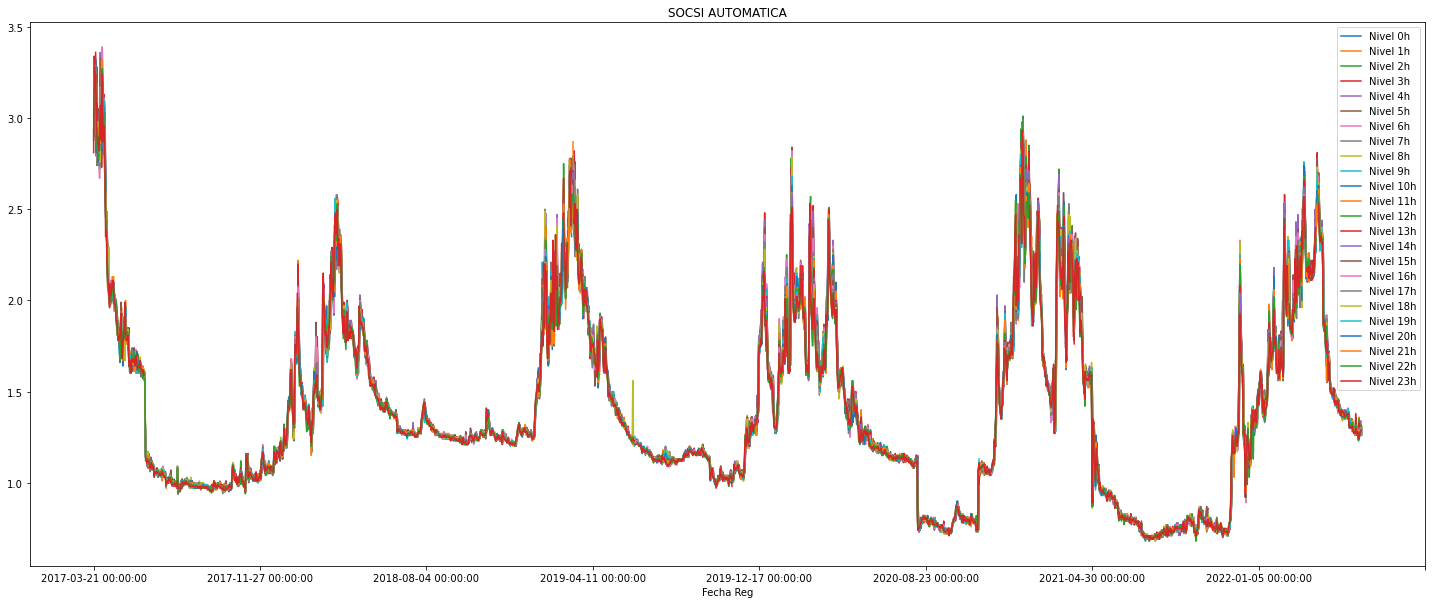

In [6]:
EMA_DZ4=Estacion_automatica.estaciones_por_dz(4)
Estacion_automatica.plot_dz_niveles()

In [7]:
Estadisticos=pd.concat(Estacion_automatica.max_historic_and_previous())
Estadisticos.to_excel('../data/horizontes/Estadisticos.xlsx',index=False)
Estadisticos.head(20)

Estaciones  Año de Inicio  Año de Fin  \
Nivel 0h    CONDORCERRO AUTOMATICA Nivel 0h           2014        2022   
Nivel 1h    CONDORCERRO AUTOMATICA Nivel 1h           2014        2022   
Nivel 2h    CONDORCERRO AUTOMATICA Nivel 2h           2014        2022   
Nivel 3h    CONDORCERRO AUTOMATICA Nivel 3h           2014        2022   
Nivel 4h    CONDORCERRO AUTOMATICA Nivel 4h           2014        2022   
Nivel 5h    CONDORCERRO AUTOMATICA Nivel 5h           2014        2022   
Nivel 6h    CONDORCERRO AUTOMATICA Nivel 6h           2014        2022   
Nivel 7h    CONDORCERRO AUTOMATICA Nivel 7h           2014        2022   
Nivel 8h    CONDORCERRO AUTOMATICA Nivel 8h           2014        2022   
Nivel 9h    CONDORCERRO AUTOMATICA Nivel 9h           2014        2022   
Nivel 10h  CONDORCERRO AUTOMATICA Nivel 10h           2014        2022   
Nivel 11h  CONDORCERRO AUTOMATICA Nivel 11h           2014        2022   
Nivel 12h  CONDORCERRO AUTOMATICA Nivel 12h           2014        2022   
Nivel 13h  CONDORCERRO AUTOMATICA Nivel 13h           2014        2022   
Nivel 14h  CONDORCERRO AUTOMATICA Nivel 14h           2014        2022   
Nivel 15h  CONDORCERRO AUTOMATICA Nivel 15h           2014        2022   
Nivel 16h  CONDORCERRO AUTOMATICA Nivel 16h           2014        2022   
Nivel 17h  CONDORCERRO AUTOMATICA Nivel 17h           2014        2022   
Nivel 18h  CONDORCERRO AUTOMATICA Nivel 18h           2014        2022   
Nivel 19h  CONDORCERRO AUTOMATICA Nivel 19h           2014        2022   

           max año previo  max historico  max año previo estiaje  \
Nivel 0h             2.46           3.60                     NaN   
Nivel 1h             1.95           3.67                     NaN   
Nivel 2h             2.36           3.69                     NaN   
Nivel 3h             2.44           3.66                     NaN   
Nivel 4h             2.52           3.69                     NaN   
Nivel 5h             2.63           3.71                     NaN   
Nivel 6h             2.46           3.69                     NaN   
Nivel 7h             2.43           3.66                     NaN   
Nivel 8h             2.80           3.52                     NaN   
Nivel 9h             2.82           3.62                     NaN   
Nivel 10h            1.99           3.60                     NaN   
Nivel 11h            2.42           3.54                     NaN   
Nivel 12h            2.89           3.52                     NaN   
Nivel 13h            2.79           3.55                     NaN   
Nivel 14h            2.04           3.52                     NaN   
Nivel 15h            2.08           3.54                     NaN   
Nivel 16h            2.11           3.51                     NaN   
Nivel 17h            2.44           3.48                     NaN   
Nivel 18h            2.34           3.44                     NaN   
Nivel 19h            2.36           3.39                     NaN   

           max año previo avenida  min año previo estiaje  \
Nivel 0h                     2.46                     NaN   
Nivel 1h                      NaN                     NaN   
Nivel 2h                     2.36                     NaN   
Nivel 3h                     2.44                     NaN   
Nivel 4h                     2.52                     NaN   
Nivel 5h                     2.63                     NaN   
Nivel 6h                     2.46                     NaN   
Nivel 7h                     2.43                     NaN   
Nivel 8h                     2.80                     NaN   
Nivel 9h                     2.82                     NaN   
Nivel 10h                    1.97                     NaN   
Nivel 11h                    2.42                     NaN   
Nivel 12h                    2.89                     NaN   
Nivel 13h                    2.79                     NaN   
Nivel 14h                     NaN                     NaN   
Nivel 15h                    2.08                     NaN   
Nivel 16h   

In [10]:
Estacion_automatica.get_log_report()['CONDORCERRO AUTOMATICA']

Codigo     Estacion            Fecha Reg  Nivel 0h  Nivel 1h  Nivel 2h  \
1292  211408  CONDORCERRO  2018-03-27 00:00:00      3.16       NaN      3.62   
1303  211408  CONDORCERRO  2018-04-07 00:00:00      3.02      2.96      3.04   
1657  211408  CONDORCERRO  2019-03-27 00:00:00      3.06      2.96      3.11   
2084  211408  CONDORCERRO  2022-03-07 00:00:00      2.94      2.95      2.94   
314   211408  CONDORCERRO  2015-03-23 00:00:00      2.79      2.88      2.89   
963   211408  CONDORCERRO  2017-03-31 00:00:00      2.86      2.84      2.91   
1295  211408  CONDORCERRO  2018-03-30 00:00:00      2.92      2.93      2.92   
1401  211408  CONDORCERRO  2018-07-14 00:00:00      0.81      0.81      0.81   
1405  211408  CONDORCERRO  2018-07-18 00:00:00      0.79      0.78      0.79   
1406  211408  CONDORCERRO  2018-07-19 00:00:00      0.80      0.78      0.74   
1419  211408  CONDORCERRO  2018-08-01 00:00:00      0.78      0.78      0.78   
1420  211408  CONDORCERRO  2018-08-02 00:00:00      0.78      0.78      0.79   
1422  211408  CONDORCERRO  2018-08-04 00:00:00      0.78      0.78      0.79   
1423  211408  CONDORCERRO  2018-08-05 00:00:00      0.79      0.81      0.80   
1424  211408  CONDORCERRO  2018-08-06 00:00:00      0.78      0.80      0.81   
1434  211408  CONDORCERRO  2018-08-16 00:00:00      0.78      0.78      0.76   
1442  211408  CONDORCERRO  2018-08-24 00:00:00       NaN       NaN      0.74   
1453  211408  CONDORCERRO  2018-09-04 00:00:00      0.85      0.84      0.81   
1488  211408  CONDORCERRO  2018-10-09 00:00:00      0.83      0.81      0.81   
1489  211408  CONDORCERRO  2018-10-10 00:00:00      0.78      0.83      0.79   
1494  211408  CONDORCERRO  2018-10-15 00:00:00      0.77      0.78      0.78   
2095  211408  CONDORCERRO  2022-03-18 00:00:00      2.92      2.91      2.89   
956   211408  CONDORCERRO  2017-03-24 00:00:00      2.87      2.85      2.85   
1421  211408  CONDORCERRO  2018-08-03 00:00:00      0.78      0.90      0.87   
1432  211408  CONDORCERRO  2018-08-14 00:00:00       NaN      0.82      0.82   
1455  211408  CONDORCERRO  2018-09-06 00:00:00      0.75      0.77       NaN   
1954  211408  CONDORCERRO  2021-03-20 00:00:00       NaN       NaN       NaN   
2067  211408  CONDORCERRO  2022-02-18 00:00:00      2.63      2.74      2.87   
1986  211408  CONDORCERRO  2021-04-21 00:00:00       NaN       NaN       NaN   
1614  211408  CONDORCERRO  2019-02-12 00:00:00      2.78      2.79      2.84   
1971  211408  CONDORCERRO  2021-04-06 00:00:00       NaN       NaN       NaN   
1660  211408  CONDORCERRO  2019-03-30 00:00:00      3.06      3.04      3.07   
1650  211408  CONDORCERRO  2019-03-20 00:00:00      3.17      3.13      3.15   
1289  211408  CONDORCERRO  2018-03-24 00:00:00      2.81      2.91      2.94   
1659  211408  CONDORCERRO  2019-03-29 00:00:00      3.03      3.06       NaN   
1658  211408  CONDORCERRO  2019-03-28 00:00:00      3.15      3.29      3.35   
1649  211408  CONDORCERRO  2019-03-19 00:00:00      2.74      2.94      3.07   
1978  211408  CONDORCERRO  2021-04-13 00:00:00       NaN       NaN       NaN   
1984  211408  CONDORCERRO  2021-04-19 00:00:00       NaN       NaN      2.13   
1966  211408  CONDORCERRO  2021-04-01 00:00:00       NaN       NaN       NaN   
1993  211408  CONDORCERRO  2021-04-28 00:00:00       NaN       NaN      1.83   
1659  211408  CONDORCERRO  2019-03-29 00:00:00      3.03      3.06       NaN   
1305  211408  CONDORCERRO  2018-04-09 00:00:00      2.81      2.96      3.10   
1981  211408  CONDORCERRO  2021-04-16 00:00:00       NaN       NaN       NaN   
1658  211408  CONDORCERRO  2019-03-28 00:00:00      3.15      3.29      3.35   
2107  211408  CONDORCERRO  2022-03-30 00:00:00      3.03      3.06      3.11   
1658  211408  CONDORCERRO  2019-03-28 00:00:00      3.15      3.29      3.35   
312   211408  CONDORCERRO  2015-03-21 00:00:00      2.67      2.69      2.70   
1291  211408  CONDORCERRO  2018-03-26 00:00:00      2.77      2.83      2.77   
1301  